In [1]:
import pandas as pd
from toolbox_ML import *
from scipy.stats import f_oneway, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Cargamos los **datos** del ejemplo de los precios de las casas en California

In [2]:
df_casas = pd.read_csv('./data/ejemplo_housing.csv')

Echamos un vistazo de los datos en el DF

In [3]:
df_casas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 2. Implementación de las funciones creadas en **Toolbox_ML**

#### Función `describe_df`

 Esta función muestra información específica del DF original. 
 
 Esa información será: el tipo de objeto, el % de valores nulos o missings, los valores únicos y el % de cardinalidad de cada columna del DF original para tener 

 *Argumentos*:

 `df`: DF original sobre el que queremos recibir la información.

 *Retorna*:

DF con la información específica.

In [5]:
describe_df(df_casas)

,COL_N,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
1,MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UNIQUE_VALUES,844,861,52,5911,1923,3879,1809,12825,3833,5
3,CARDIN (%),4.13,4.21,0.25,28.93,9.41,18.98,8.85,62.77,18.76,0.02


#### Función `tipifica_variables`

Esta función sirve para poder tipificar las variables de un DF dado en categórica, numerica continua o numerica discreta.

*Argumentos:*

`df`: DF original para adquirir las variables que se quiera tificar.
`umbral_categoria`: un entero donde corresponda al umbral que queramos asignar a una variable categórica.
`umbral_continua`: un float donde corresponda al umbral que queramos asignar a una variable numérica.

*Retorna:*

Un DF con dos columnas `nombre_varibale` y `tipo_sugerido`, que tendrá tantas filas como columnas haya en el DF original.

In [6]:
# Cheque del control de errores

tipifica_variables(df_casas, 8.9, 10.0)

TypeError: El valor de "umbral_categoria" debe ser de tipo <class 'int'>, pero recibió de tipo <class 'float'>

In [ ]:
tipifica_variables(df_casas, 6, 4)

TypeError: El valor de "umbral_continua" debe ser de tipo <class 'float'>, pero recibió de tipo <class 'int'>

In [ ]:
tipifica_variables(df_casas, 7, 4.0)

,nombre_variable,tipo_variable
0,longitude,Numérica Continua
1,latitude,Numérica Continua
2,housing_median_age,Numérica Discreta
3,total_rooms,Numérica Continua
4,total_bedrooms,Numérica Continua
5,population,Numérica Continua
6,households,Numérica Continua
7,median_income,Numérica Continua
8,median_house_value,Numérica Continua
9,ocean_proximity,Categórica


#### Función `get_features_num_regression`

Obtiene las columnas numéricas cuya correlación con target_col es significativa.

*Argumentos*:

`df`: DataFrame que contiene los datos.

`target_col`: Nombre de la columna objetivo (debe ser numérica).

`umbral_corr`: Umbral de correlación para filtrar las columnas.

`pvalue`: Umbral de significancia para el valor p. Si es None, solo se considera el umbral de correlación.


*Retorna*:

Lista de nombres de columnas que cumplen con los criterios.

In [ ]:
#Chequeo de errores
get_features_num_regression(df_casas, 'median_house_value', 2)

TypeError: El valor dado en "umbral_corr" debe ser de tipo <class 'float'>, pero recibió un valor de tipo <class 'int'>

In [ ]:
get_features_num_regression(df_casas, 'median_house_value', 2.3)

ValueError: El valor de "umbral_corr" no está entre 0 y 1 ya que el valor es 2.3

In [ ]:
get_features_num_regression(df_casas, 'ocean_proximity', 0.5)

TypeError: La target "ocean_proximity", no es de tipo numérico, ya que esta variable es de tipo object

In [ ]:
# Si pvalue == None
get_features_num_regression(df_casas, 'median_house_value', 0.05)

Las correlaciones con las demás variables numéricas y "median_house_value" son:

median_house_value    1.000000
median_income         0.688355
latitude              0.144638
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
longitude             0.045398
population            0.025300
Name: median_house_value, dtype: float64

Lista de variables numéricas que tiene correlación según el umbral dado en la función:


['median_income',
 'latitude',
 'total_rooms',
 'housing_median_age',
 'households']

In [ ]:
# Si el pvalue != None
get_features_num_regression(df_casas, 'median_house_value', 0.05, 0.95)

Las correlaciones con las demás variables numéricas y "median_house_value" son:

median_house_value    1.000000
median_income         0.688355
latitude              0.144638
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
longitude             0.045398
population            0.025300
Name: median_house_value, dtype: float64

Lista de variables numéricas que tiene correlación según el umbral dado en la función:
['median_income', 'latitude', 'total_rooms', 'housing_median_age', 'households']

Las features numéricas con una significancia del 95.0 % son:


['median_income',
 'latitude',
 'total_rooms',
 'housing_median_age',
 'households']

#### Función `plot_features_num_regression`

Esta función sirve para visualizar aquellas variables que tengan correlación con la variable objetivo.

*Argumentos*:

`df`: DataFrame que contiene los valores.

`target_col`: Teniendo un valor por defecto "".

`columns`: Lista de strings cuyo valor por defecto es una lista vacía.

`umbral_corr`: Con valor por defecto 0

`pvalue`: Umbral de significancia para el valor p. Por defecto, con valor None

*Retorna*:

Un pairplot del DataFrame consirando los valores adjuducados en cada argumento de la función.

Como no hay columnas en la lista del argumento usamos las numéricas, que son:  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Las columnas válidas para el pairplot son ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


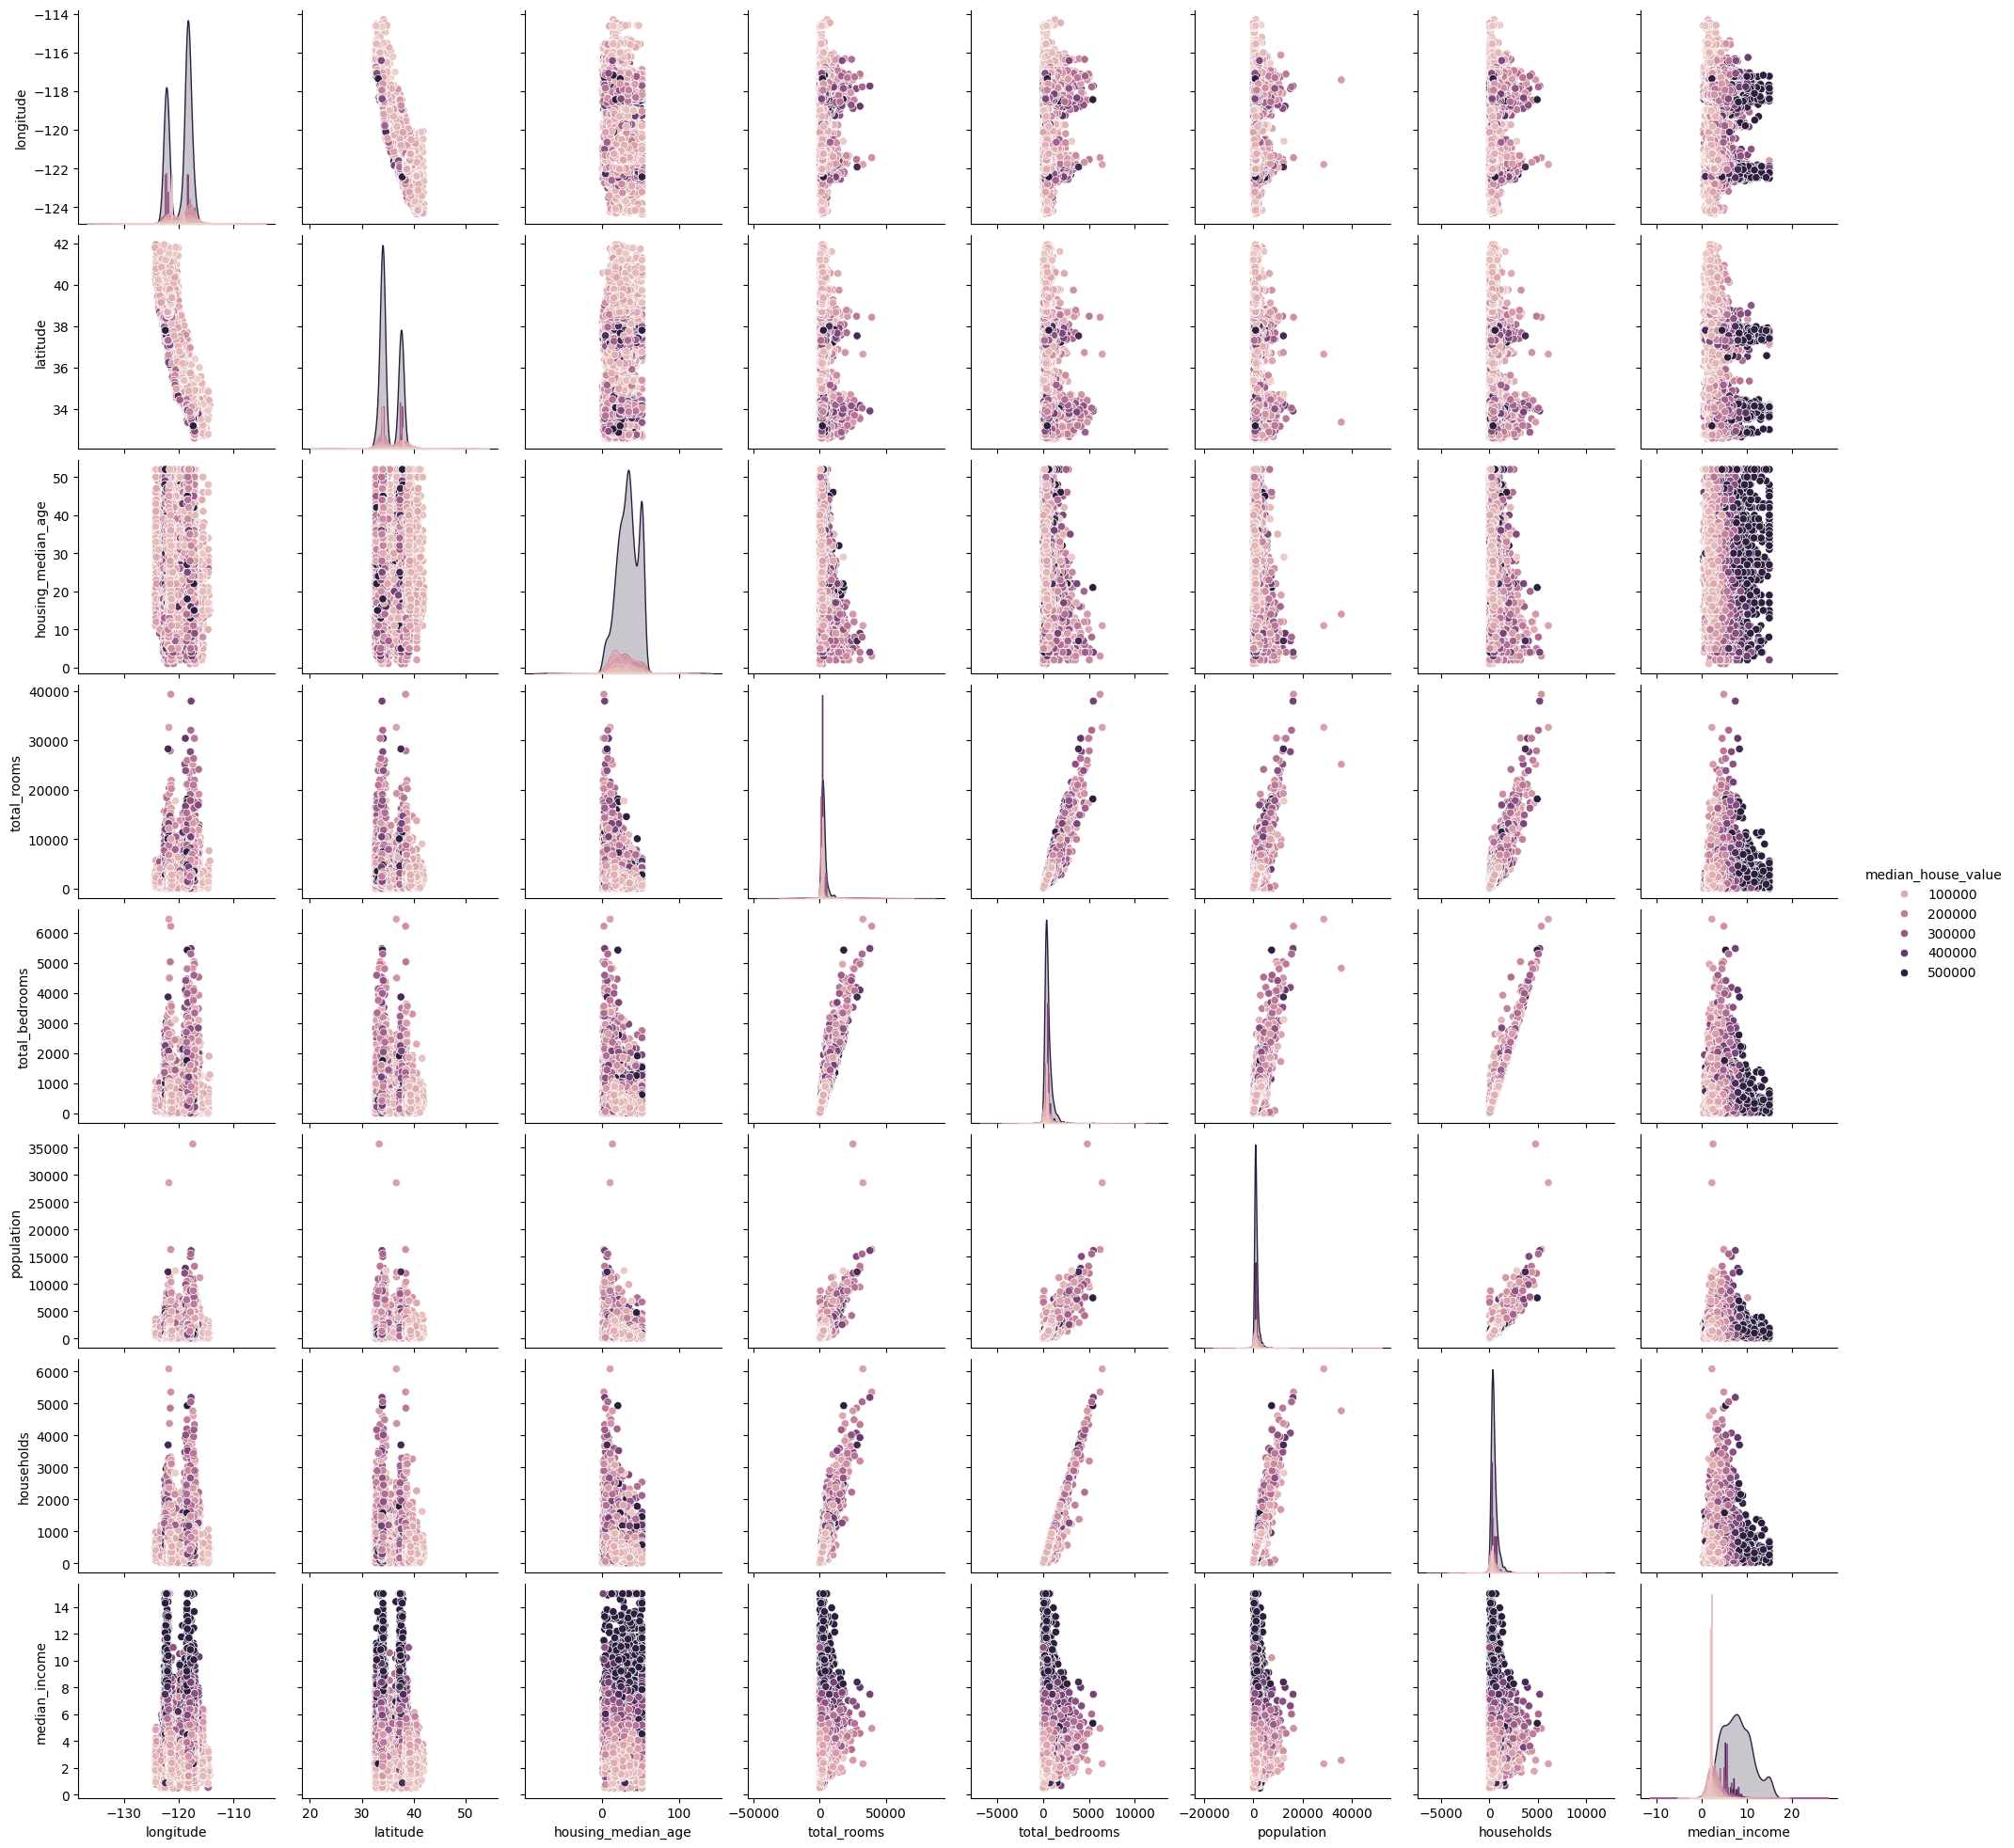

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [7]:
plot_features_num_regression (df_casas, target_col="median_house_value", columns=[], umbral_corr=0.01, pvalue=None)

#### Función `get_features_cat_regression`

Esta funcion devueleve una lista con las variables categoricas del dataframe que guardan una relacion siginificativa con la variable target, superando el test ANOVA con una confianza estadistica del 95%. Evalua los argumentos de entrada y retornara None en caso de que alguno de los valores de entrada no sean adecuados. 

*Argumentos:*

`df` : (`pd.Dataframe`) Dataframe con las variables que se quieren testar.
`target_col` : (`df["columna_target"]`) Columna del dataframe que se toma como objetivo (y).
`p_value` : (`float`) Por defecto `0.05`. Umbral de confianza estadistica. 

*Retorna:*

Una `lista` con las variables categoricas del dataframe. 

In [ ]:
get_features_cat_regression(df_casas, "median_house_value")

Las variables categóricas encontradas son: ['ocean_proximity']


In [ ]:
get_features_cat_regression(df_casas, "median_house_value", 0.01) # Probamos a subir el pvalor

Las variables categóricas encontradas son: ['ocean_proximity']


In [ ]:
get_features_cat_regression(df_casas, "median_income") # Probamos con otra columna target 

Las variables categóricas encontradas son: ['ocean_proximity']


In [ ]:
df_titanic = pd.read_csv('./data/titanic.csv')

In [ ]:
get_features_cat_regression(df_titanic, 'fare')

Las variables categóricas encontradas son: ['sex', 'sibsp', 'parch', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']


### Función `plot_features_cat_regression`

Esta función genera histogramas agrupados para variables categóricas y evalúa su relación con una columna objetivo usando un test estadístico, devolviendo las columnas que cumplen con un criterio de significancia.

Argumentos:

	
-	df (pd.DataFrame): DataFrame con los datos.
-	target_col (str): Columna objetivo - numérica contínua o discreta con alta cardinalidad (por defecto "").
-	columns (list): Lista de columnas categóricas a evaluar (por defecto vacía).
-	pvalue (float): Nivel de significancia estadística (por defecto 0.05).
-	with_individual_plot (bool): Si es True, genera histogramas individuales por categoría (por defecto False).

Comportamiento:

-	Si columns no está vacío, evalúa las variables categóricas en la lista y genera gráficos si son significativas. Utilizará ANOVA (Análisis de varianza)
-	Si columns está vacío, se toman las variables numéricas del DataFrame para el análisis. En este caso de utilizará el método de correlación de Pearson (mide la fuerza y la dirección de la relación lineal entre dos variables numéricas continuas. Su valor oscila entre -1 y 1:)

Retorna:

-	Lista de columnas que tienen una relación significativa con la columna objetivo.

In [ ]:
# Uso de la función sin generar histograma y lista de variables categóricas (para este caso solo hay una) 
plot_features_cat_regression (df_casas, "median_house_value", columns=["ocean_proximity"], with_individual_plot=False)

['ocean_proximity']

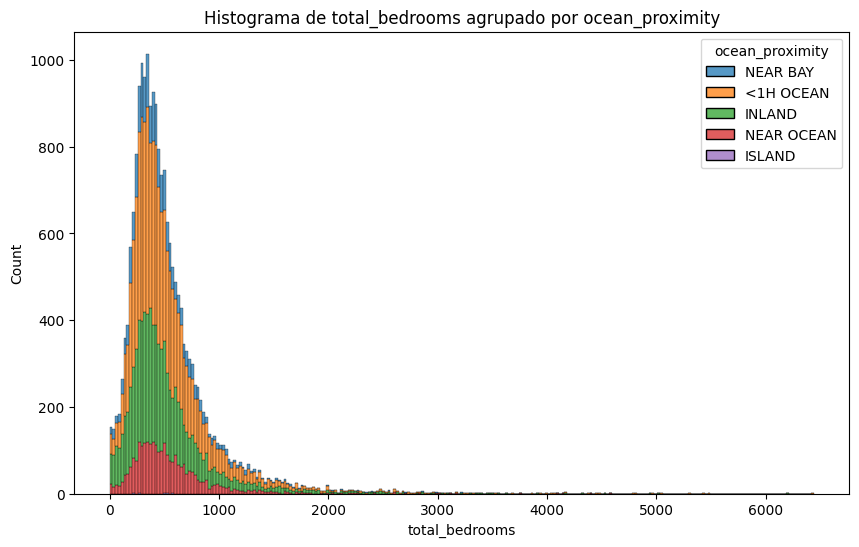

['ocean_proximity']

In [ ]:
# Uso de la función generando histograma y lista de variables categóricas (para este caso solo hay una) 
plot_features_cat_regression (df_casas, "total_bedrooms", columns=["ocean_proximity"], with_individual_plot=True)

In [ ]:
# Uso de la función generando histograma, lista de variables categóricas (para este caso solo hay una), y modificando el pvalue
plot_features_cat_regression (df_casas, "total_bedrooms", columns=["ocean_proximity"], pvalue=0.01, with_individual_plot=True)

No se encontraron columnas con una relación estadísticamente significativa con la variable objetivo.


[]

In [ ]:
# Uso de la función sin generar gráfico y lista de variables categóricas vacía
plot_features_cat_regression (df_casas, "median_house_value", columns=[], with_individual_plot=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'median_income',
 'median_house_value']

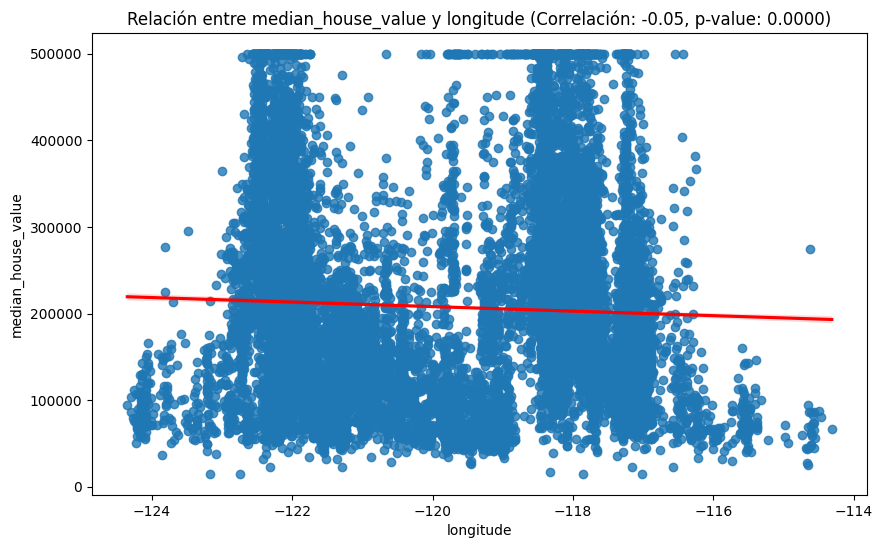

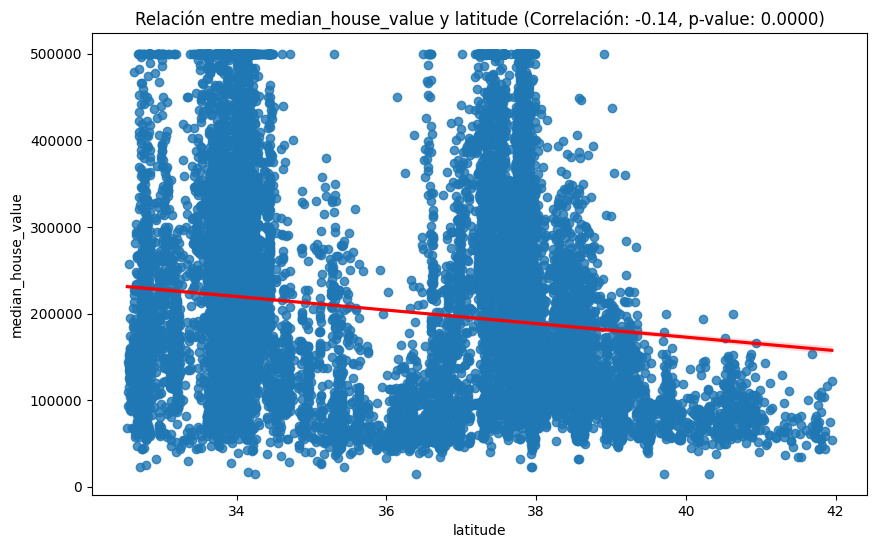

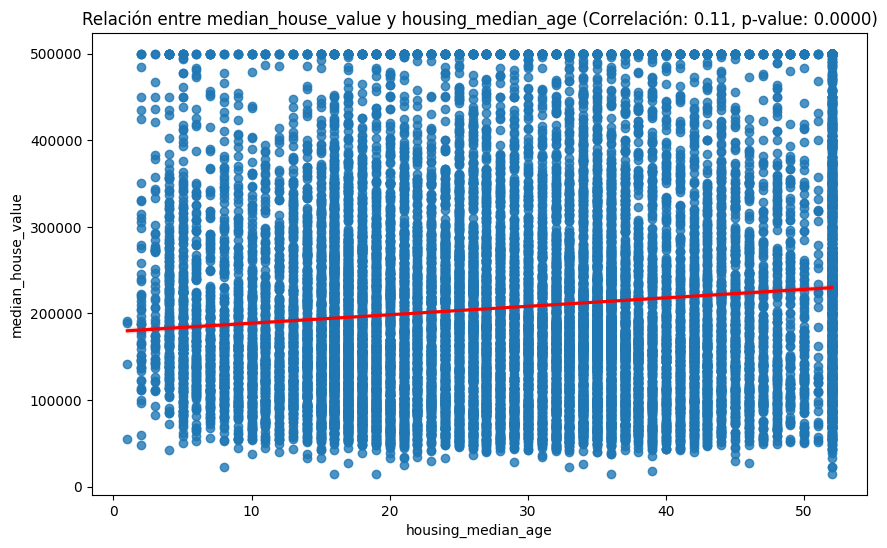

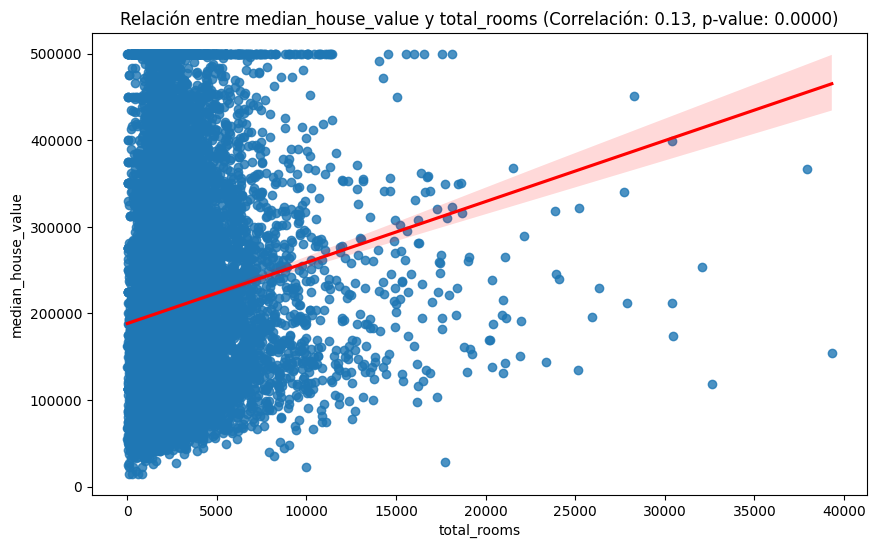

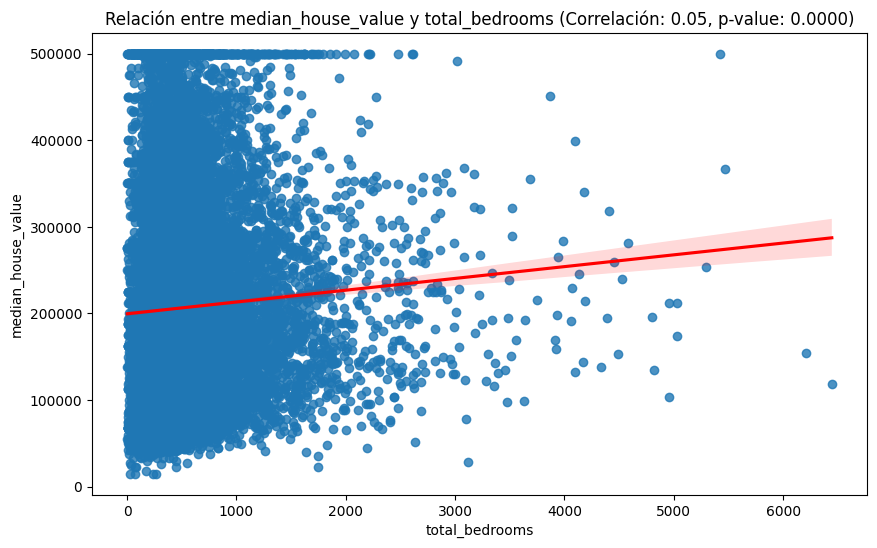

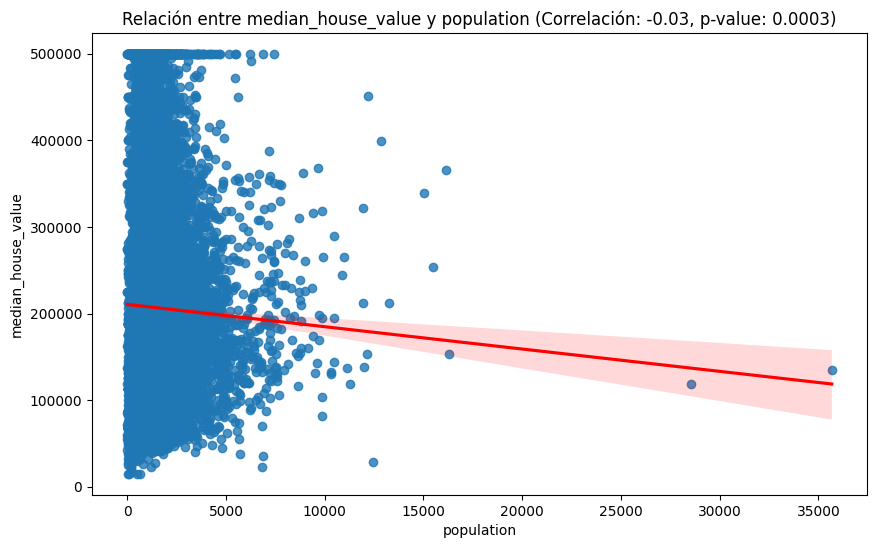

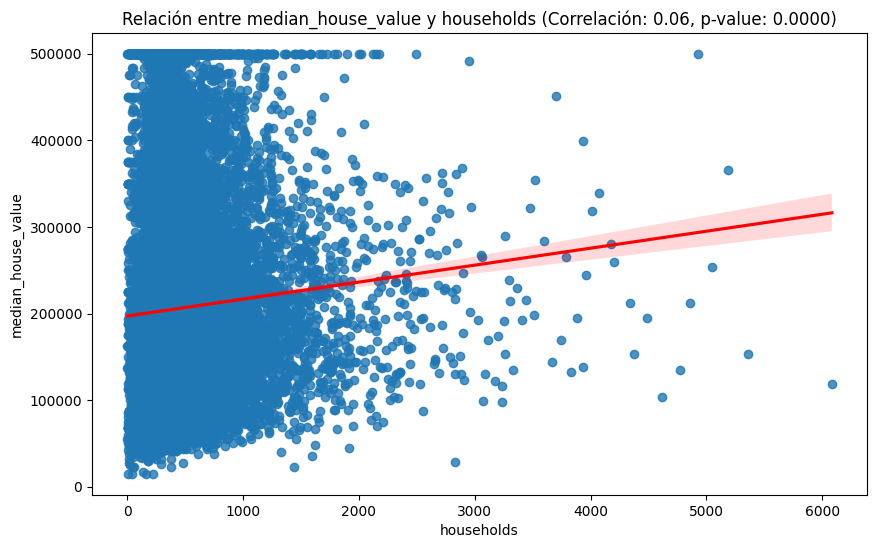

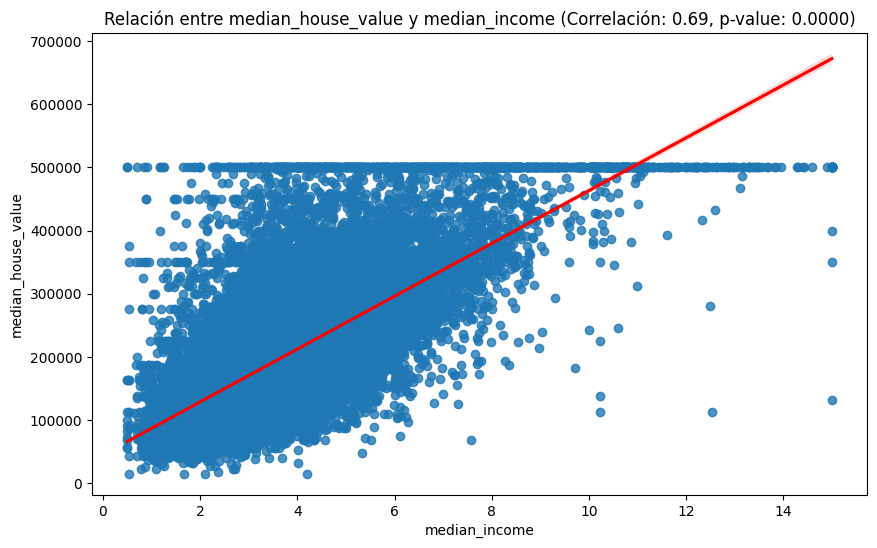

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [ ]:
# Uso de la función generando gráfico y lista de variables categóricas vacía
plot_features_cat_regression (df_casas, "median_house_value", columns=[], with_individual_plot=True)